In [5]:
import numpy as np
import pandas as pd
mc=pd.read_csv('/content/Mall_Customers.csv')
mc

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mc.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
mc.shape

(200, 5)

In [9]:
mc.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
X=mc.iloc[:,[0,-1]].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


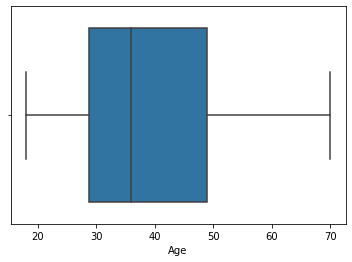

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=sns.boxplot(mc['Age'])
plt.show()

In [12]:
mc=pd.DataFrame(np.random.randn(100,3))
from scipy import stats 
mc[(np.abs(stats.zscore(mc))<3).all(axis=1)]

,0,1,2
0,-0.779695,-0.809281,1.202257
1,-2.266201,-0.787261,1.296404
2,-1.687407,-0.146321,0.905904
3,-0.687544,-0.850056,-0.521148
4,1.343117,0.330914,-1.121652
...,...,...,...
95,-0.007611,1.079792,-0.571453
96,0.964811,-1.575011,-1.133226
97,-0.633553,0.156655,1.449098
98,-0.353619,0.250927,-0.663761


In [13]:
from sklearn import datasets
iris=datasets.load_iris()

In [14]:
mc=pd.DataFrame({
    'x':iris.data[:,0],
    'y':iris.data[:,-1],
    'cluster':iris.target})
mc

,x,y,cluster
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0
...,...,...,...
145,6.7,2.3,2
146,6.3,1.9,2
147,6.5,2.0,2
148,6.2,2.3,2


In [15]:
cendroids={}
for i in range(3):
  result_list=[]
  result_list.append(mc.loc[mc['cluster']==i]['x'].mean())
  result_list.append(mc.loc[mc['cluster']==i]['y'].mean())
  cendroids[i]=result_list
  cendroids

Text(0, 0.5, 'Age')

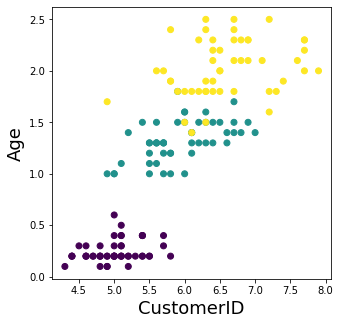

In [16]:
fig=plt.figure(figsize=(5,5))
plt.scatter(mc['x'],mc['y'],c=iris.target)
plt.xlabel('CustomerID',fontsize=18)
plt.ylabel('Age',fontsize=18)

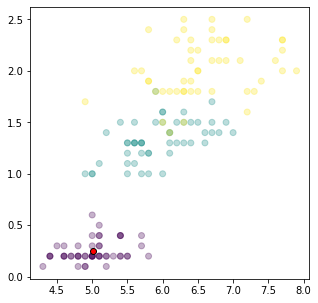

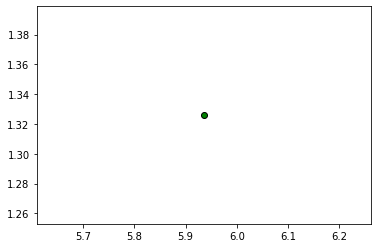

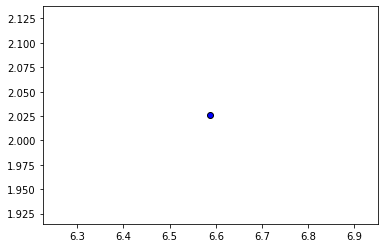

In [17]:
fig=plt.figure(figsize=(5,5))
plt.scatter(mc['x'],mc['y'],c=iris.target,alpha=0.3)
colmap={0:'r',1:'g',2:'b'}
col=[0,1]
for i in cendroids.keys():
  plt.scatter(cendroids[i][0],cendroids[i][1],c=colmap[i],edgecolor='k')
  plt.show()

>1.0 1.0=0.000000
>1.0 0.9=0.010000
>1.0 0.8=0.040000
>1.0 0.7=0.090000
>1.0 0.6=0.160000
>1.0 0.5=0.250000
>1.0 0.4=0.360000
>1.0 0.3=0.490000
>1.0 0.2=0.640000
>1.0 0.1=0.810000
>1.0 0.0=1.000000


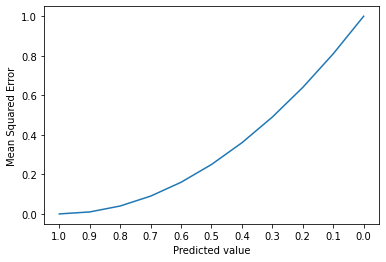

In [18]:
from matplotlib import pyplot as pyplot
from sklearn.metrics import mean_squared_error
expected=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
predicted=[1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
errors=list()
for i in range(len(expected)):
  err=(expected[i]-predicted[i])**2
  errors.append(err)
  print('>%.1f %.1f=%3f'%(expected[i],predicted[i],err))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))],labels=predicted)
pyplot.xlabel('Predicted value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=mc.iloc[:,0:-1].values
y=mc.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [20]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [21]:
pred=log_reg.predict(x_test)

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
metrics.confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [25]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
pred1=dt.predict(x_test)

In [27]:
print(metrics.classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.92      0.92        13
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

